<a href="https://colab.research.google.com/github/nickandmartinlearnstuff/practical-deep-learning-fast-ai/blob/main/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ep. 01 - Learning Machine Learning with fast.ai

- [Twitch](http://bit.ly/nmtwitch)
- [YouTube](https://www.youtube.com/channel/UCuS_eA__r_hZuteBHnJWu0Q)
- [Github](http://bit.ly/nmgithub)
- [Twitter](http://bit.ly/nmlearnstufftwitter)

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 194kB 18.7MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 1.0MB 23.1MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 40kB 5.4MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 2.6MB 43.3MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *

## Cat & Dog Classifier

In [3]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

## Training the Cat Classifier

In [4]:
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

cat_learn = cnn_learner(dls, resnet34, metrics=error_rate)
cat_learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.178429,0.027083,0.008796,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.055637,0.016015,0.004060,02:07


## Training the Dog Classifier

In [5]:
def is_dog(x): return x[0].islower()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

dog_learn = cnn_learner(dls, resnet34, metrics=error_rate)
dog_learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.129947,0.040659,0.009472,01:31


epoch,train_loss,valid_loss,error_rate,time
0,0.070140,0.034043,0.009472,02:08


### Upload Photos

In [6]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" id="upload" src="https://github.com/fastai/fastbook/blob/master/images/att_00008.png?raw=1">

Here is where we receive the classification results

Is this a cat?: True.
Probability it's a cat: 1.000000


Is this a dog?: False.
Probability it's a dog: 0.000015


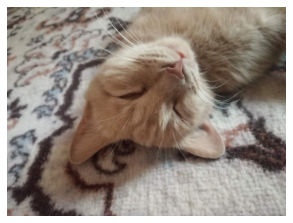

In [14]:
img = PILImage.create(uploader.data[0])
img.show()

is_cat,_,probs = cat_learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

is_dog,_,probs = dog_learn.predict(img)
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

### Jargon Recap


| Term | Meaning |
|-----|------|
|Label | The data that we're trying to predict, such as "dog" or "cat"|
|Architecture | The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to|
|Model | The combination of the architecture with a particular set of parameters|
|Parameters | The values in the model that change what task it can do, and are updated through model training|
|Fit | Update the parameters of the model such that the predictions of the model using the input data match the target labels|
|Train | A synonym for _fit_|
|Pretrained model | A model that has already been trained, generally using a large dataset, and will be fine-tuned|
|Fine-tune | Update a pretrained model for a different task|
|Epoch | One complete pass through the input data|
|Loss | A measure of how good the model is, chosen to drive training via SGD|
|Metric | A measurement of how good the model is, using the validation set, chosen for human consumption|
|Validation set | A set of data held out from training, used only for measuring how good the model is|
|Training set | The data used for fitting the model; does not include any data from the validation set|
|Overfitting | Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training|
|CNN | Convolutional neural network; a type of neural network that works particularly well for computer vision tasks|

## Questionnaire

Helpful Links:

- [book's website](https://book.fast.ai)
- [the forums](https://forums.fast.ai)
- [aiquizzes](http://aiquizzes.com/howto)

1. Do you need these for deep learning?

   - Lots of math T / F
   - Lots of data T / F
   - Lots of expensive computers T / F
   - A PhD T / F
   
1. Name five areas where deep learning is now the best in the world.
1. What was the name of the first device that was based on the principle of the artificial neuron?
1. Based on the book of the same name, what are the requirements for parallel distributed processing (PDP)?
1. What were the two theoretical misunderstandings that held back the field of neural networks?
1. What is a GPU?
1. Open a notebook and execute a cell containing: `1+1`. What happens?
1. Follow through each cell of the stripped version of the notebook for this chapter. Before executing each cell, guess what will happen.
1. Complete the Jupyter Notebook online appendix.
1. Why is it hard to use a traditional computer program to recognize images in a photo?
1. What did Samuel mean by "weight assignment"?
1. What term do we normally use in deep learning for what Samuel called "weights"?
1. Draw a picture that summarizes Samuel's view of a machine learning model.
1. Why is it hard to understand why a deep learning model makes a particular prediction?
1. What is the name of the theorem that shows that a neural network can solve any mathematical problem to any level of accuracy?
1. What do you need in order to train a model?
1. How could a feedback loop impact the rollout of a predictive policing model?
1. Do we always have to use 224×224-pixel images with the cat recognition model?
1. What is the difference between classification and regression?
1. What is a validation set? What is a test set? Why do we need them?
1. What will fastai do if you don't provide a validation set?
1. Can we always use a random sample for a validation set? Why or why not?
1. What is overfitting? Provide an example.
1. What is a metric? How does it differ from "loss"?
1. How can pretrained models help?
1. What is the "head" of a model?
1. What kinds of features do the early layers of a CNN find? How about the later layers?
1. Are image models only useful for photos?
1. What is an "architecture"?
1. What is segmentation?
1. What is `y_range` used for? When do we need it?
1. What are "hyperparameters"?
1. What's the best way to avoid failures when using AI in an organization?

### Further Research

1. Why is a GPU useful for deep learning? How is a CPU different, and why is it less effective for deep learning?
1. Try to think of three areas where feedback loops might impact the use of machine learning. See if you can find documented examples of that happening in practice.